In [ ]:
batch_size = 64
epochs = 25

In [ ]:
opt = Adam(lr = 1e-3)

In [ ]:
merged_model.compile(optimizer = opt,
 loss = 'categorical_crossentropy',
 metrics = ['accuracy'])

In [ ]:
history= merged_model.fit([X_train_rgb, X_train_sift], y_train_rgb,
                          validation_data=([X_test_rgb, X_test_sift], y_test_rgb),
                          epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/25
38/38 [==============================] - 19s 189ms/step - loss: 3.0306 - accuracy: 0.1233 - val_loss: 2.2068 - val_accuracy: 0.1550
Epoch 2/25
38/38 [==============================] - 4s 113ms/step - loss: 2.0461 - accuracy: 0.2663 - val_loss: 1.7453 - val_accuracy: 0.4133
Epoch 3/25
38/38 [==============================] - 5s 120ms/step - loss: 1.4848 - accuracy: 0.5263 - val_loss: 1.1300 - val_accuracy: 0.7083
Epoch 4/25
38/38 [==============================] - 5s 133ms/step - loss: 0.8679 - accuracy: 0.7671 - val_loss: 0.6282 - val_accuracy: 0.8367
Epoch 5/25
38/38 [==============================] - 4s 113ms/step - loss: 0.4576 - accuracy: 0.8850 - val_loss: 0.4196 - val_accuracy: 0.8850
Epoch 6/25
38/38 [==============================] - 4s 114ms/step - loss: 0.2816 - accuracy: 0.9342 - val_loss: 0.3339 - val_accuracy: 0.9083
Epoch 7/25
38/38 [==============================] - 5s 130ms/step - loss: 0.1675 - accuracy: 0.9600 - val_loss: 0.1805 - val_accuracy: 0.9583
Epoch

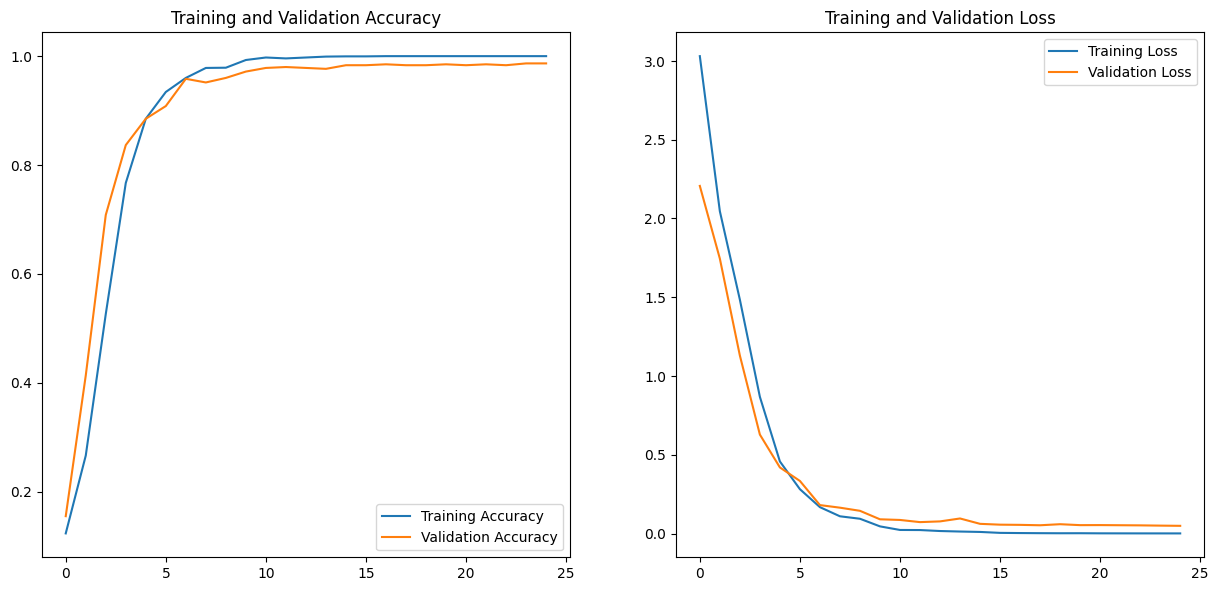

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25
                    )

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions_x=merged_model.predict([X_test_rgb,X_test_sift])
classes_x=np.argmax(predictions_x,axis=1)

y_test_rgb=np.argmax(y_test_rgb,axis=1)

print(classification_report(y_test_rgb, classes_x, target_names = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']))

19/19 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

          C0       0.98      1.00      0.99        60
          C1       0.98      0.97      0.97        60
          C2       0.98      1.00      0.99        60
          C3       0.98      0.98      0.98        60
          C4       1.00      0.98      0.99        60
          C5       0.97      0.98      0.98        60
          C6       0.98      1.00      0.99        60
          C7       1.00      1.00      1.00        60
          C8       1.00      1.00      1.00        60
          C9       0.98      0.95      0.97        60

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [ ]:
cm = confusion_matrix(y_test_rgb, classes_x)
cm

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 58,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 60,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 59,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 60,  0],
       [ 0,  0,  0,  1,  0,  1,  1,  0,  0, 57]])

In [ ]:
# Mendapatkan nilai akurasi pelatihan dan  pengujian (testing)
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Mencetak nilai akurasi pelatihan dan pengujian (testing)
print("Train Accuracy:", train_accuracy[-1])
print("Test Accuracy:", test_accuracy[-1])

Train Accuracy: 1.0
Test Accuracy: 0.9866666793823242
